<a href="https://colab.research.google.com/github/Hasebul21/brainstorm-ml/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as ppt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [50]:
df = pd.read_csv('/content/naive_byes.csv')
print(df.columns)
df.drop('User ID', axis=1, inplace=True)
df

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [51]:
print(df['Gender'].isnull().sum())
print(df['Age'].isnull().sum())
print(df['EstimatedSalary'].isnull().sum())

0
0
0


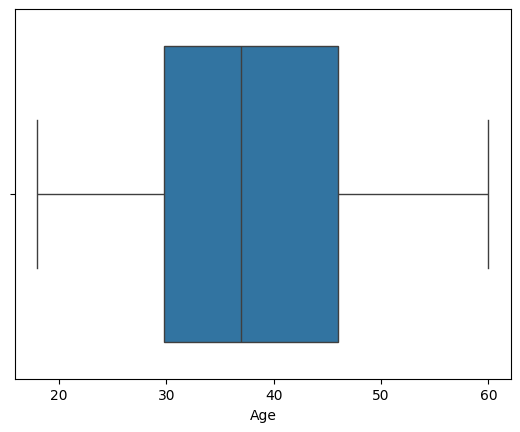

In [52]:
sb.boxplot(x=df["Age"])
ppt.show()

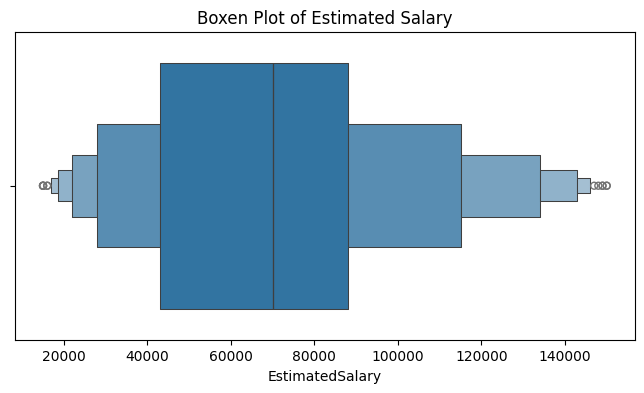

In [53]:
ppt.figure(figsize=(8,4))
sb.boxenplot(x=df["EstimatedSalary"])
ppt.title("Boxen Plot of Estimated Salary")
ppt.show()

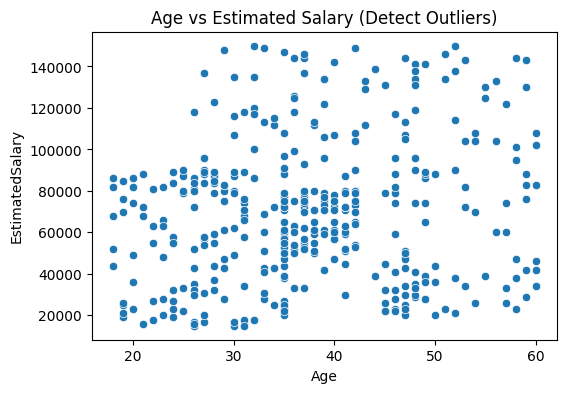

In [54]:
ppt.figure(figsize=(6,4))
sb.scatterplot(x=df["Age"], y=df["EstimatedSalary"])
ppt.title("Age vs Estimated Salary (Detect Outliers)")
ppt.show()

In [55]:
encode = OneHotEncoder()
encoded = encode.fit_transform(df[['Gender']]).toarray()
columns = encode.get_feature_names_out(['Gender'])
encoded_df = pd.DataFrame(encoded, columns=columns)
df = pd.concat([df.drop('Gender', axis=1), encoded_df], axis=1)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0.0,1.0
1,35,20000,0,0.0,1.0
2,26,43000,0,1.0,0.0
3,27,57000,0,1.0,0.0
4,19,76000,0,0.0,1.0


In [56]:
X = df.drop('Purchased', axis=1)
Y = df['Purchased']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)

(320, 4)


In [57]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [59]:
Y_pred = classifier.predict(X_test)
accurayScore = accuracy_score(Y_test, Y_pred)
print(accurayScore)

0.925
